In [100]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import numpy as np
import os
import sys

In [88]:
df = pd.read_csv(r"D:\Open Classroom\pydatadc_2018-tidy-master\pydatadc_2018-tidy-master\data\billboard.csv")
pd.set_option("display.max_rows", 250)
df.head()
#df.shape

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,...,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87,82.0,72.0,77.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91,87.0,92.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,81,70.0,68.0,67.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,3 Doors Down,Loser,4:24,2000-10-21,76,76.0,72.0,69.0,67.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,57,34.0,25.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
df.shape

(317, 81)

In [90]:
#using the melt func to clean data
df = pd.melt(df, id_vars = ["year", "artist", "track", "time", "date.entered"],
            var_name = "week", value_name = "ratings")
df.head(5)

,year,artist,track,time,date.entered,week,ratings
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk1,57.0


In [91]:
df = df.dropna(axis = "index", how = "any")
df

,year,artist,track,time,date.entered,week,ratings
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk1,57.0
...,...,...,...,...,...,...,...
19716,2000,Creed,Higher,5:16,1999-09-11,wk63,50.0
19833,2000,Lonestar,Amazed,4:25,1999-06-05,wk63,45.0
20033,2000,Creed,Higher,5:16,1999-09-11,wk64,50.0
20150,2000,Lonestar,Amazed,4:25,1999-06-05,wk64,50.0


In [92]:
df["date.entered"] = pd.to_datetime(df["date.entered"], format = "%Y-%m-%d")
df["date"] = df["date.entered"].astype(str)
df["date"] = pd.to_datetime(df["date"])
df["dayofweek"] = df["date.entered"].dt.day_name()
df.head(10)

,year,artist,track,time,date.entered,week,ratings,date,dayofweek
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0,2000-02-26,Saturday
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0,2000-09-02,Saturday
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0,2000-04-08,Saturday
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0,2000-10-21,Saturday
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk1,57.0,2000-04-15,Saturday
5,2000,98^0,Give Me Just One Nig...,3:24,2000-08-19,wk1,51.0,2000-08-19,Saturday
6,2000,A*Teens,Dancing Queen,3:44,2000-07-08,wk1,97.0,2000-07-08,Saturday
7,2000,Aaliyah,I Don't Wanna,4:15,2000-01-29,wk1,84.0,2000-01-29,Saturday
8,2000,Aaliyah,Try Again,4:03,2000-03-18,wk1,59.0,2000-03-18,Saturday
9,2000,"Adams, Yolanda",Open My Heart,5:30,2000-08-26,wk1,76.0,2000-08-26,Saturday


In [93]:
df.drop(columns = ["date.entered"])

,year,artist,track,time,week,ratings,date,dayofweek
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,wk1,87.0,2000-02-26,Saturday
1,2000,2Ge+her,The Hardest Part Of ...,3:15,wk1,91.0,2000-09-02,Saturday
2,2000,3 Doors Down,Kryptonite,3:53,wk1,81.0,2000-04-08,Saturday
3,2000,3 Doors Down,Loser,4:24,wk1,76.0,2000-10-21,Saturday
4,2000,504 Boyz,Wobble Wobble,3:35,wk1,57.0,2000-04-15,Saturday
...,...,...,...,...,...,...,...,...
19716,2000,Creed,Higher,5:16,wk63,50.0,1999-09-11,Saturday
19833,2000,Lonestar,Amazed,4:25,wk63,45.0,1999-06-05,Saturday
20033,2000,Creed,Higher,5:16,wk64,50.0,1999-09-11,Saturday
20150,2000,Lonestar,Amazed,4:25,wk64,50.0,1999-06-05,Saturday


In [94]:
dateFilt = df["ratings"] > 50
df.loc[dateFilt, ["artist"]].head(5)

,artist
0,2 Pac
1,2Ge+her
2,3 Doors Down
3,3 Doors Down
4,504 Boyz


In [98]:
df = df.set_index(df["date.entered"])
df["date"].sort_values(ascending = False)
pd.set_option("display.max_rows", 1000)
df.head(10)

,year,artist,track,time,date.entered,week,ratings,date,dayofweek
date.entered,,,,,,,,,
2000-02-26,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0,2000-02-26,Saturday
2000-09-02,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0,2000-09-02,Saturday
2000-04-08,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0,2000-04-08,Saturday
2000-10-21,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0,2000-10-21,Saturday
2000-04-15,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk1,57.0,2000-04-15,Saturday
2000-08-19,2000,98^0,Give Me Just One Nig...,3:24,2000-08-19,wk1,51.0,2000-08-19,Saturday
2000-07-08,2000,A*Teens,Dancing Queen,3:44,2000-07-08,wk1,97.0,2000-07-08,Saturday
2000-01-29,2000,Aaliyah,I Don't Wanna,4:15,2000-01-29,wk1,84.0,2000-01-29,Saturday
2000-03-18,2000,Aaliyah,Try Again,4:03,2000-03-18,wk1,59.0,2000-03-18,Saturday


In [96]:
df["ratings"].resample("y").max()

date.entered
1999-12-31    100.0
2000-12-31    100.0
Freq: A-DEC, Name: ratings, dtype: float64

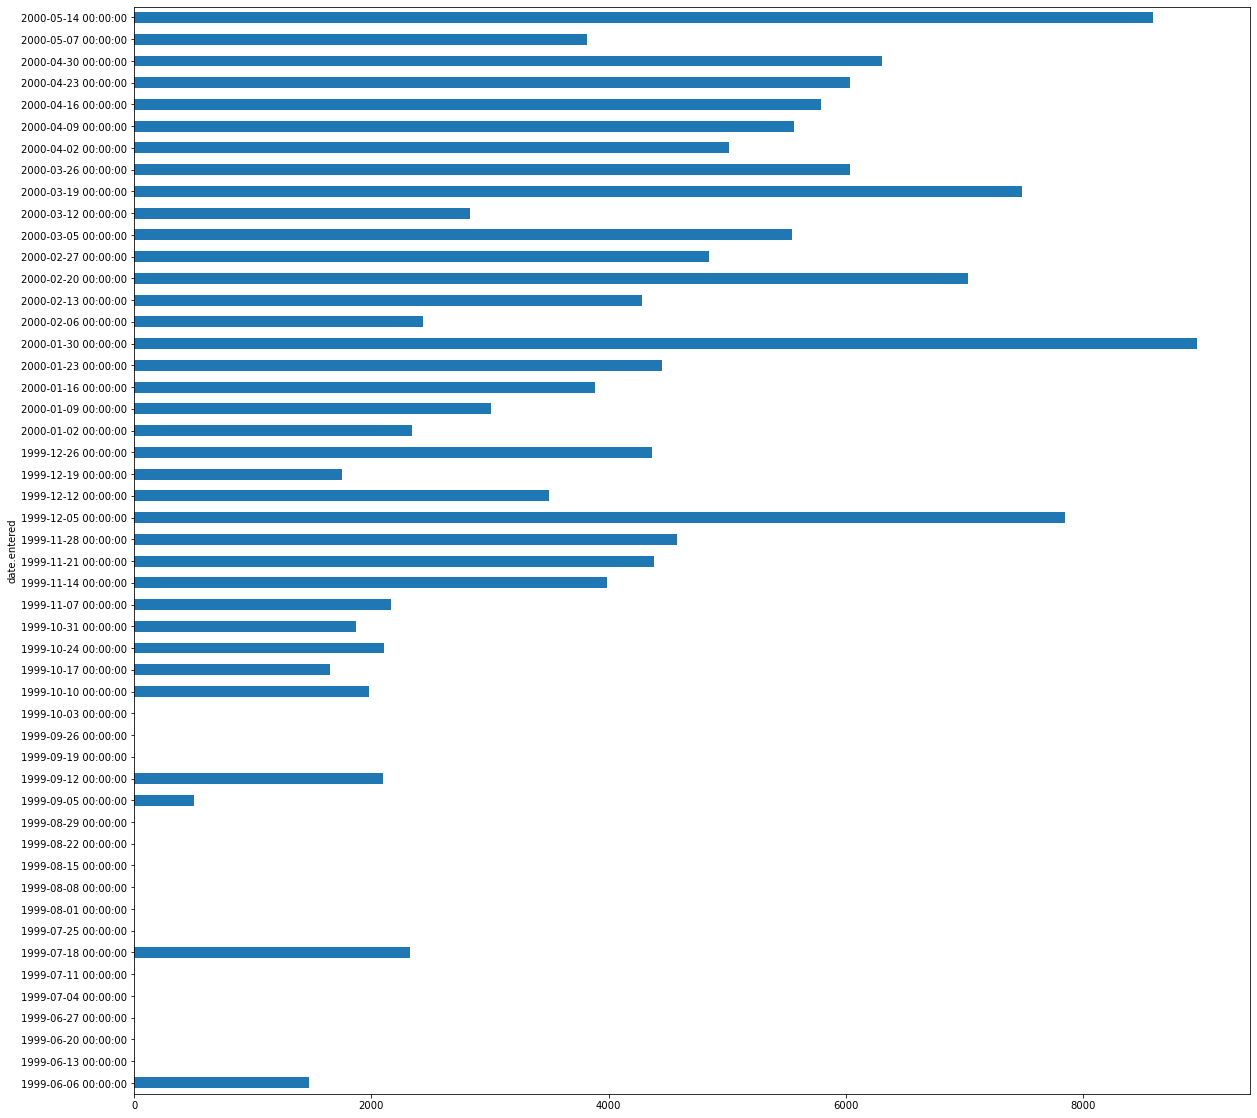

In [108]:
plt.figure(figsize = (20,20))
df["ratings"].resample("w").sum().head(50).plot(kind = "barh")